<h1> Import Libaries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from PIL import Image


In [3]:
df = pd.read_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/ChurnModelDataFrame.csv')

In [4]:
df.shape

(1000000, 75)

In [5]:
for col in df.columns:
    print(col)

Unnamed: 0
SK_Date
AccountNumber
MonthNumber
DateOpened
FirstBetDate
ClientProfileSummary
Gender
Age
CashActive_YN
L1DSBTurnover
L7DSBTurnover
L30DSBTurnover
L90DSBTurnover
L1DSBNetRevenue
L7DSBNetRevenue
L30DSBNetRevenue
L90DSBNetRevenue
L1DSBFreeBetsHandle
L7DSBFreeBetsHandle
L30DSBFreeBetsHandle
L90DSBFreeBetsHandle
L1DSBBetCount
L7DSBBetCount
L30DSBBetCount
L90DSBBetCount
L1DDepositCount
L7DDepositCount
L30DDepositCount
L90DDepositCount
L1DSoccerTurnover
L7DSoccerTurnover
L30DSoccerTurnover
L90DSoccerTurnover
L1DDepositAmount
L7DDepositAmount
L30DDepositAmount
L90DDepositAmount
L1DWithdrawalAmount
L7DWithdrawalAmount
L30DWithdrawalAmount
L90DWithdrawalAmount
AccountBalance
L1DCasBetCount
L7DCasBetCount
L30DCasBetCount
L90DCasBetCount
L1DCasNetRevenue
L7DCasNetRevenue
L30DCasNetRevenue
L90DCasNetRevenue
L1DOtherSportsBetCount
L7DOtherSportsBetCount
L30DOtherSportsBetCount
L90DOtherSportsBetCount
US_SportsTurnover1D
US_SportsTurnover7D
US_SportsTurnover30D
US_SportsTurnover90D
L1DUns

<h4>The company classifies a customer as churned if they do not make a cash bet

In [16]:
#df.rename(columns = {'Churn':'Active_Next30Days_Cash_YN'}, inplace = True)

In [6]:
df['Active_Next30Days_Cash_YN'] = df['Active_Next30Days_Cash_YN'].replace({0:"no",1:"yes"})

<h2> Dimensionality Reduction

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 75 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1000000 non-null  int64  
 1   SK_Date                       1000000 non-null  object 
 2   AccountNumber                 1000000 non-null  int64  
 3   MonthNumber                   1000000 non-null  int64  
 4   DateOpened                    1000000 non-null  object 
 5   FirstBetDate                  1000000 non-null  object 
 6   ClientProfileSummary          1000000 non-null  int64  
 7   Gender                        1000000 non-null  int64  
 8   Age                           1000000 non-null  int64  
 9   CashActive_YN                 1000000 non-null  int64  
 10  L1DSBTurnover                 1000000 non-null  float64
 11  L7DSBTurnover                 1000000 non-null  float64
 12  L30DSBTurnover               

Remove string variables and Account Numbers


In [8]:
remove_cols = ['AccountNumber','Prediction_End_Date','FirstBetDate','SK_Date','DateOpened']

In [9]:
dr_df = df.drop(columns=remove_cols, axis=1)

<h1> Dimensionality Reduction </h1>

 - ANOVA
 - Kendall's Rank

<h3> Use ANOVA to feature select the top 20 variables that correlate

In [10]:
y = dr_df['Active_Next30Days_Cash_YN']
X = dr_df.drop(columns=['Active_Next30Days_Cash_YN'], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

First, select all variables and perform analysis of variance test to determine correlation

In [12]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [13]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 8.870795
Feature 1: 9660.990046
Feature 2: 44164.394597
Feature 3: 11662.180040
Feature 4: 4575.998940
Feature 5: 137669.200156
Feature 6: 387.383394
Feature 7: 513.179263
Feature 8: 707.865880
Feature 9: 928.340394
Feature 10: 5.078751
Feature 11: 24.981373
Feature 12: 118.963527
Feature 13: 292.505136
Feature 14: 408.778512
Feature 15: 1765.964776
Feature 16: 3627.104724
Feature 17: 4059.409609
Feature 18: 34349.652402
Feature 19: 52311.048727
Feature 20: 57399.247633
Feature 21: 52527.660504
Feature 22: 14095.897255
Feature 23: 29941.069922
Feature 24: 37990.060592
Feature 25: 37468.408339
Feature 26: 414.031028
Feature 27: 653.426885
Feature 28: 810.325176
Feature 29: 1017.056388
Feature 30: 737.015438
Feature 31: 2616.406070
Feature 32: 2209.422653
Feature 33: 1474.700227
Feature 34: 604.149440
Feature 35: 2125.517777
Feature 36: 3355.970553
Feature 37: 3755.279808
Feature 38: 1934.342737
Feature 39: 3408.563721
Feature 40: 6396.842150
Feature 41: 7379.106473
Feature 42

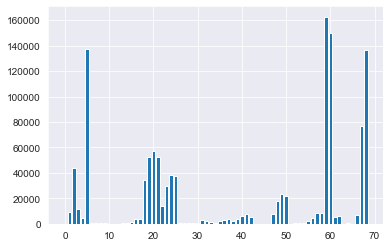

In [14]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The f-statistic is quite high for some variables

Variance is the measurement of the spread between numbers in a variable. It measures how far a number is from the mean and every number in a variable.
The variance of a feature determines how much it is impacting the response variable. If the variance is low, it implies there is no impact of this feature on response and vice-versa.

<h3> Now, select the top 20 variables

In [18]:
# feature selection
def select_features_20(X_train, y_train, X_test):
	# configure to select all features
	fs20 = SelectKBest(score_func=f_classif,k=20)
	# learn relationship from training data
	fs20.fit(X_train, y_train)
	# transform train input data
	X_train_fs20 = fs20.transform(X_train)
	# transform test input data
	X_test_fs20 = fs20.transform(X_test)

	return X_train_fs20, X_test_fs20, fs20

In [19]:
# feature selection
X_train_fs20, X_test_fs20, fs20 = select_features_20(X_train, y_train, X_test)

In [20]:
print('Original number of features:', X_test.shape)
print('Reduced number of features:', X_test_fs20.shape)

Original number of features: (300000, 69)
Reduced number of features: (300000, 20)


In [21]:
# get columns to keep and create new dataframe with those only
cols = fs20.get_support(indices=True)
# add target variable

Anova_df = dr_df.iloc[:,cols]

In [22]:
anova_dataframe = pd.concat([Anova_df,dr_df['Active_Next30Days_Cash_YN']],axis=1)

In [35]:
anova_dataframe.head()

,MonthNumber,ClientProfileSummary,Gender,CashActive_YN,L1DSBBetCount,L7DSBBetCount,L30DSBBetCount,L90DSBBetCount,L1DDepositCount,L7DDepositCount,...,L90DDepositCount,L7DOtherSportsBetCount,L30DOtherSportsBetCount,L90DOtherSportsBetCount,L90DUnsuccessfulDepositCount,DaysSinceLastSBCashAPD,DaysSinceLastSBAPD,OlderMale40,CustomerConcession90days,Active_Next30Days_Cash_YN
0,1,2,1,1,1,1,5,15,1,1,...,12,0,0,2,1,0,0,0.0,1.0,yes
1,8,2,1,0,0,0,0,8,0,0,...,2,0,0,4,12,52,52,0.0,1.0,yes
2,12,2,1,0,0,1,16,50,0,0,...,1,0,4,14,1,2,2,0.0,1.0,yes
3,3,2,1,0,0,0,1,2,0,0,...,3,0,0,0,0,21,18,1.0,1.0,yes
4,9,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,200,200,0.0,0.0,no


In [48]:
# convert columns to list
anova_columns = list(anova_dataframe.columns)

<h3> Kendall's Rank </h3>

it helps to uncover complex and unknown relationships between the variables in your data set which you can’t tell just by looking at the data.

Assumptions
You need to check that your data satisfies the assumptions before you dive into using Kendall’s rank correlation. This will ensure that you have valid results that you can actually use and not just numbers on your monitor.

The variables are measured on an ordinal or continuous scale. Ordinal scales are typically measures of non-numeric concepts like satisfaction, happiness, discomfort. e.g. Very Satisfied, Somewhat Satisfied, Neutral, Somewhat Unsatisfied, Very Unsatisfied. Continuous scales are essentially interval (i.e. temperature e.g. 30 degrees) or ratio variables (e.g. weight, height).
Desirable if your data appears to follow a monotonic relationship. In simple terms, as the value of one variable increases, so does the other variable and as the value of once variable increases, the other variable decreases. Here’s why: Kendall’s rank correlation measures the strength and direction of association that exists (determines if there’s a monotonic relationship) between two variables. Knowing this, testing for the presence of a monotonic relationship makes sense. But, like I said, it is desirable.


In [58]:
kendall_test_df = dr_df
kendall_test_df = kendall_test_df.drop('Unnamed: 0',axis=1)

In [59]:
# remap target column to be numerical
kendall_test_df['Active_Next30Days_Cash_YN'] = kendall_test_df['Active_Next30Days_Cash_YN'].replace({"no":0,"yes":1})

int_cols = kendall_test_df.select_dtypes(include="int64").columns
kendall_test_df[int_cols] = kendall_test_df[int_cols].astype("float64")

In [60]:
kendall_corr = kendall_test_df.corr(method="kendall")

C:\Users\paulc\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


 RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))

Normalize the columns to overcome avoce longlong_scalar error!

In [61]:
from sklearn.preprocessing import Normalizer
# define min max scaler
scaler = Normalizer()
# transform data
scaled = scaler.fit_transform(kendall_test_df)
scaled = pd.DataFrame(scaled,columns=kendall_test_df.columns)

In [62]:
scaled

,MonthNumber,ClientProfileSummary,Gender,Age,CashActive_YN,L1DSBTurnover,L7DSBTurnover,L30DSBTurnover,L90DSBTurnover,L1DSBNetRevenue,...,DaysSinceLastSBAPD,DaysSinceOpened,DaysSinceFirstBet,DaysFromOpenToFirstBet,Active_Next30Days_Cash_YN,BetOnRegistrationDay,YoungMale1840,OlderMale40,CustomerConcession90days,CustomerConcession30days
0,0.001668,0.003337,0.001668,0.061730,0.001668,0.046715,0.046715,0.155159,0.338681,0.0,...,0.000000,0.535550,0.535550,0.000000,0.001668,0.001668,0.001668,0.000000,0.001668,0.001668
1,0.016488,0.004122,0.002061,0.061832,0.000000,0.000000,0.000000,0.000000,0.160309,0.0,...,0.107175,0.381296,0.381296,0.000000,0.002061,0.002061,0.002061,0.000000,0.002061,0.000000
2,0.006615,0.001102,0.000551,0.016537,0.000000,0.000000,0.005011,0.087238,0.642290,0.0,...,0.001102,0.173087,0.173087,0.000000,0.000551,0.000551,0.000551,0.000000,0.000551,0.000551
3,0.002487,0.001658,0.000829,0.046416,0.000000,0.000000,0.000000,0.016577,0.033154,0.0,...,0.014919,0.298387,0.297558,0.000829,0.000829,0.000000,0.000000,0.000829,0.000829,0.000829
4,0.022299,0.004955,0.000000,0.099109,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.495543,0.500498,0.498021,0.002478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.003261,0.003261,0.001631,0.045655,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.223382,0.653841,0.653841,0.000000,0.000000,0.001631,0.001631,0.000000,0.000000,0.000000
999996,0.003522,0.000587,0.000294,0.011154,0.000294,0.024950,0.096116,0.356317,0.656597,0.0,...,0.000000,0.016731,0.016731,0.000000,0.000294,0.000294,0.000294,0.000000,0.000294,0.000294
999997,0.000180,0.000359,0.000180,0.006823,0.000180,0.017056,0.102916,0.331394,0.695499,0.0,...,0.000000,0.019749,0.019749,0.000000,0.000180,0.000180,0.000180,0.000000,0.000180,0.000180
999998,0.000457,0.000457,0.000229,0.008691,0.000229,0.005718,0.022872,0.138660,0.755637,0.0,...,0.000000,0.032478,0.032478,0.000000,0.000229,0.000229,0.000229,0.000000,0.000229,0.000229


In [63]:
kendall_corr = scaled.corr(method="kendall")['Active_Next30Days_Cash_YN']

C:\Users\paulc\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


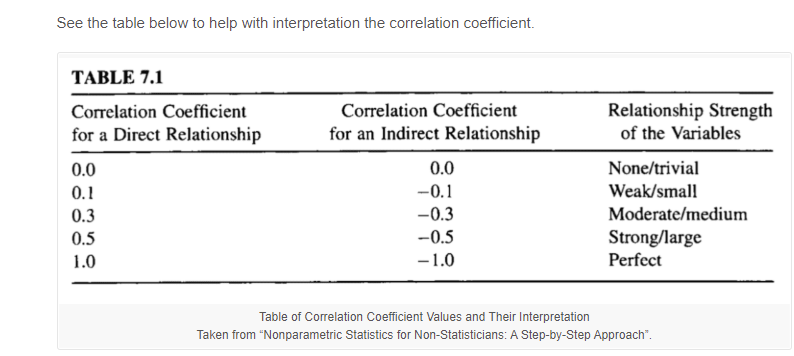

In [66]:
file = "C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/Notes/kendall.png"
try:
    img  = Image.open(file)
except IOError:
    pass

img

In [67]:
# pick the top 20 variables, include target so its 21.

kendall_corr_positive = kendall_corr[kendall_corr  >= 0.1].nlargest(21)
kendall_corr_positive

Active_Next30Days_Cash_YN    1.000000
L7DSBBetCount                0.464604
L30DSBBetCount               0.445412
L7DSBTurnover                0.436577
US_SportsTurnover7D          0.412384
L30DSBTurnover               0.408173
US_SportsTurnover30D         0.386683
L30DOtherSportsBetCount      0.353664
L90DSBBetCount               0.339919
L90DOtherSportsBetCount      0.329525
CashActive_YN                0.323312
CustomerConcession30days     0.317568
L1DSBBetCount                0.315356
L90DSBTurnover               0.308782
L1DSBTurnover                0.305064
US_SportsTurnover1D          0.303908
L30DSBFreeBetsHandle         0.288136
US_SportsTurnover90D         0.285242
L7DOtherSportsBetCount       0.279274
L7DSBFreeBetsHandle          0.278531
L30DDepositCount             0.269474
Name: Active_Next30Days_Cash_YN, dtype: float64

In [68]:
# retrieve the columns

for key, value in kendall_corr_positive.iteritems():
	print(key)
	kendall_columns = kendall_corr_positive.keys()

Active_Next30Days_Cash_YN
L7DSBBetCount
L30DSBBetCount
L7DSBTurnover
US_SportsTurnover7D
L30DSBTurnover
US_SportsTurnover30D
L30DOtherSportsBetCount
L90DSBBetCount
L90DOtherSportsBetCount
CashActive_YN
CustomerConcession30days
L1DSBBetCount
L90DSBTurnover
L1DSBTurnover
US_SportsTurnover1D
L30DSBFreeBetsHandle
US_SportsTurnover90D
L7DOtherSportsBetCount
L7DSBFreeBetsHandle
L30DDepositCount


In [70]:
kendall_columns = list(kendall_columns)
kendall_columns

['Active_Next30Days_Cash_YN',
 'L7DSBBetCount',
 'L30DSBBetCount',
 'L7DSBTurnover',
 'US_SportsTurnover7D',
 'L30DSBTurnover',
 'US_SportsTurnover30D',
 'L30DOtherSportsBetCount',
 'L90DSBBetCount',
 'L90DOtherSportsBetCount',
 'CashActive_YN',
 'CustomerConcession30days',
 'L1DSBBetCount',
 'L90DSBTurnover',
 'L1DSBTurnover',
 'US_SportsTurnover1D',
 'L30DSBFreeBetsHandle',
 'US_SportsTurnover90D',
 'L7DOtherSportsBetCount',
 'L7DSBFreeBetsHandle',
 'L30DDepositCount']

In [71]:
# target variable is categorical so needs to be removed to filter df and then we can later join.

kendall_columns = ['L7DSBBetCount','L30DSBBetCount','L7DSBTurnover','US_SportsTurnover7D','L30DSBTurnover','US_SportsTurnover30D',
 'L30DOtherSportsBetCount','L90DSBBetCount','L90DOtherSportsBetCount','CashActive_YN','CustomerConcession30days',
 'L1DSBBetCount','L90DSBTurnover','L1DSBTurnover','US_SportsTurnover1D','L30DSBFreeBetsHandle','US_SportsTurnover90D','L7DOtherSportsBetCount',
'L7DSBFreeBetsHandle','L30DDepositCount']

In [72]:
kendall_df = dr_df.loc[:,kendall_columns]

In [73]:
kendall_dataframe = pd.concat([kendall_df,dr_df['Active_Next30Days_Cash_YN']],axis=1)

In [74]:
kendall_dataframe.head()

,L7DSBBetCount,L30DSBBetCount,L7DSBTurnover,US_SportsTurnover7D,L30DSBTurnover,US_SportsTurnover30D,L30DOtherSportsBetCount,L90DSBBetCount,L90DOtherSportsBetCount,CashActive_YN,...,L1DSBBetCount,L90DSBTurnover,L1DSBTurnover,US_SportsTurnover1D,L30DSBFreeBetsHandle,US_SportsTurnover90D,L7DOtherSportsBetCount,L7DSBFreeBetsHandle,L30DDepositCount,Active_Next30Days_Cash_YN
0,1.0,5.0,28.00,28.00,93.00,93.00,0.0,15.0,2.0,1.0,...,1.0,203.00,28.0,28.0,40.0,173.00,0.0,10.0,5.0,1.0
1,0.0,0.0,0.00,0.00,0.00,0.00,0.0,8.0,4.0,0.0,...,0.0,77.78,0.0,0.0,0.0,52.08,0.0,0.0,0.0,1.0
2,1.0,16.0,9.09,9.09,158.26,132.27,4.0,50.0,14.0,0.0,...,0.0,1165.19,0.0,0.0,40.0,840.07,0.0,10.0,0.0,1.0
3,0.0,1.0,0.00,0.00,20.00,20.00,0.0,2.0,0.0,0.0,...,0.0,40.00,0.0,0.0,30.0,40.00,0.0,0.0,2.0,1.0
4,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [75]:
anova_dataframe.head()

,MonthNumber,ClientProfileSummary,Gender,CashActive_YN,L1DSBBetCount,L7DSBBetCount,L30DSBBetCount,L90DSBBetCount,L1DDepositCount,L7DDepositCount,...,L90DDepositCount,L7DOtherSportsBetCount,L30DOtherSportsBetCount,L90DOtherSportsBetCount,L90DUnsuccessfulDepositCount,DaysSinceLastSBCashAPD,DaysSinceLastSBAPD,OlderMale40,CustomerConcession90days,Active_Next30Days_Cash_YN
0,1,2,1,1,1,1,5,15,1,1,...,12,0,0,2,1,0,0,0.0,1.0,yes
1,8,2,1,0,0,0,0,8,0,0,...,2,0,0,4,12,52,52,0.0,1.0,yes
2,12,2,1,0,0,1,16,50,0,0,...,1,0,4,14,1,2,2,0.0,1.0,yes
3,3,2,1,0,0,0,1,2,0,0,...,3,0,0,0,0,21,18,1.0,1.0,yes
4,9,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,200,200,0.0,0.0,no


Save down the dataframes

In [78]:
#kendall_dataframe.to_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/kendall_dataframe.csv',index=False)
#anova_dataframe.to_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/anova_dataframe.csv',index=False)

Create a unified dataframe with columns extracted from kendall and anova tests

In [26]:
import pandas as pd

anova_dataframe = pd.read_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/anova_dataframe.csv')
kendall_dataframe = pd.read_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/kendall_dataframe.csv')
churn = pd.read_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/ChurnModelDataFrame.csv')

In [25]:
kendall_dataframe.shape

(1000000, 21)

In [19]:
anova_dataframe.shape

(1000000, 21)

In [4]:
anova_dataframe.columns

Index(['MonthNumber', 'ClientProfileSummary', 'Gender', 'CashActive_YN',
       'L1DSBBetCount', 'L7DSBBetCount', 'L30DSBBetCount', 'L90DSBBetCount',
       'L1DDepositCount', 'L7DDepositCount', 'L30DDepositCount',
       'L90DDepositCount', 'L7DOtherSportsBetCount', 'L30DOtherSportsBetCount',
       'L90DOtherSportsBetCount', 'L90DUnsuccessfulDepositCount',
       'DaysSinceLastSBCashAPD', 'DaysSinceLastSBAPD', 'OlderMale40',
       'CustomerConcession90days', 'Active_Next30Days_Cash_YN'],
      dtype='object')

In [27]:
churn = churn[['MonthNumber', 'ClientProfileSummary', 'Gender', 'CashActive_YN',
       'L1DSBBetCount', 'L7DSBBetCount', 'L30DSBBetCount', 'L90DSBBetCount',
       'L1DDepositCount', 'L7DDepositCount', 'L30DDepositCount',
       'L90DDepositCount', 'L7DOtherSportsBetCount', 'L30DOtherSportsBetCount',
       'L90DOtherSportsBetCount', 'L90DUnsuccessfulDepositCount',
       'DaysSinceLastSBCashAPD', 'DaysSinceLastSBAPD', 'OlderMale40',
       'CustomerConcession90days', 'Active_Next30Days_Cash_YN','L7DSBBetCount','L30DSBBetCount','L7DSBTurnover','US_SportsTurnover7D','L30DSBTurnover','US_SportsTurnover30D',
 'L30DOtherSportsBetCount','L90DSBBetCount','L90DOtherSportsBetCount','CashActive_YN','CustomerConcession30days',
 'L1DSBBetCount','L90DSBTurnover','L1DSBTurnover','US_SportsTurnover1D','L30DSBFreeBetsHandle','US_SportsTurnover90D','L7DOtherSportsBetCount',
'L7DSBFreeBetsHandle','L30DDepositCount','Active_Next30Days_Cash_YN']]

In [28]:
churn.shape

(1000000, 42)

In [17]:
churn.columns

Index(['MonthNumber', 'ClientProfileSummary', 'Gender', 'CashActive_YN',
       'L1DSBBetCount', 'L7DSBBetCount', 'L30DSBBetCount', 'L90DSBBetCount',
       'L1DDepositCount', 'L7DDepositCount', 'L30DDepositCount',
       'L90DDepositCount', 'L7DOtherSportsBetCount', 'L30DOtherSportsBetCount',
       'L90DOtherSportsBetCount', 'L90DUnsuccessfulDepositCount',
       'DaysSinceLastSBCashAPD', 'DaysSinceLastSBAPD', 'OlderMale40',
       'CustomerConcession90days', 'Active_Next30Days_Cash_YN',
       'L7DSBBetCount', 'L30DSBBetCount', 'L7DSBTurnover',
       'US_SportsTurnover7D', 'L30DSBTurnover', 'US_SportsTurnover30D',
       'L30DOtherSportsBetCount', 'L90DSBBetCount', 'L90DOtherSportsBetCount',
       'CashActive_YN', 'CustomerConcession30days', 'L1DSBBetCount',
       'L90DSBTurnover', 'L1DSBTurnover', 'US_SportsTurnover1D',
       'L30DSBFreeBetsHandle', 'US_SportsTurnover90D',
       'L7DOtherSportsBetCount', 'L7DSBFreeBetsHandle', 'L30DDepositCount'],
      dtype='object')

In [29]:
churn.to_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/ChurnModelv1.csv',index=False)

In [3]:
df = pd.read_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/ChurnModelv1.csv')

<h3> Scale the dataset prior to modelling </h3>
StandardScaler is the industry’s go-to algorithm. 🙂

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

StandardScaler makes the mean of the distribution approximately 0.



In [8]:
from sklearn.preprocessing import MinMaxScaler

# define standard scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)


In [9]:
scaled = pd.DataFrame(scaled, columns = df.columns)
scaled

,MonthNumber,ClientProfileSummary,Gender,CashActive_YN,L1DSBBetCount,L7DSBBetCount,L30DSBBetCount,L90DSBBetCount,L1DDepositCount,L7DDepositCount,...,US_SportsTurnover7D,L30DSBTurnover,US_SportsTurnover30D,CustomerConcession30days,L90DSBTurnover,L1DSBTurnover,US_SportsTurnover1D,L30DSBFreeBetsHandle,US_SportsTurnover90D,L7DSBFreeBetsHandle
0,0.000000,0.166667,1.0,1.0,0.004367,0.000925,0.001623,0.002450,0.005319,0.004255,...,0.000004,0.000005,0.000005,1.0,0.000008,0.000026,0.000016,0.000200,0.000007,0.000073
1,0.636364,0.166667,1.0,0.0,0.000000,0.000000,0.000000,0.001307,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000003,0.000000,0.000000,0.000000,0.000002,0.000000
2,1.000000,0.166667,1.0,0.0,0.000000,0.000925,0.005193,0.008166,0.000000,0.000000,...,0.000001,0.000009,0.000007,1.0,0.000049,0.000000,0.000000,0.000200,0.000036,0.000073
3,0.181818,0.166667,1.0,0.0,0.000000,0.000000,0.000325,0.000327,0.000000,0.000000,...,0.000000,0.000001,0.000001,1.0,0.000002,0.000000,0.000000,0.000150,0.000002,0.000000
4,0.727273,0.166667,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.090909,0.166667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
999996,1.000000,0.166667,1.0,1.0,0.017467,0.013876,0.017527,0.019272,0.000000,0.000000,...,0.000048,0.000065,0.000051,1.0,0.000093,0.000077,0.000047,0.000200,0.000070,0.000073
999997,0.000000,0.166667,1.0,1.0,0.017467,0.014801,0.016878,0.022211,0.000000,0.000000,...,0.000056,0.000100,0.000079,1.0,0.000161,0.000087,0.000000,0.000699,0.000134,0.000000
999998,0.090909,0.166667,1.0,1.0,0.004367,0.003700,0.007465,0.016985,0.000000,0.000000,...,0.000004,0.000033,0.000010,1.0,0.000138,0.000023,0.000014,0.000200,0.000107,0.000000


In [10]:
scaled.to_csv('C:/Users/paulc/Documents/Data Analysis Courses/MastersChurn/ProjectWork/ChurnModelScaled.csv')